In [77]:
%load_ext autoreload
%autoreload 2

%pylab inline

import dataloaders
import models
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics 
import sklearn.cluster as cluster
import numpy as np 
import random
import classifiers
from torch.autograd import Variable
import torch
import torch.nn as nn 
import torch.optim as optim
import util

from imblearn.under_sampling import RandomUnderSampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'clf', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [60]:
output_file_vot = '../data/senate-104-cleaned.csv'
output_file_nam = '../data/senate-104-classes.csv'
data = dataloaders.SenateDataset(output_file_vot, output_file_nam, ratio=0.8, delimiter=',')

In [78]:
util.get_num_unbalanced(data.X, data.y)

0.53588425661526751

In [61]:
num_nodes = data.get_num_nodes()
dims = 32
epochs = 200
lr = 0.1
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
X_train, y_train = data.get_training_set()
X_test, y_test = data.get_testing_set()
p = 2
X = data.X
y = data.y

model_fitter = models.fit_pseudo_kernel_model

In [62]:
kernel_model = model_fitter(num_nodes, dims, X, y, epochs=epochs, p=p, 
                                              lr=lr,lr_decay=lr_decay, lam=lam, 
                            weight_decay=weight_decay, undersample=False)

The loss at epoch  1  was  0.7014658451080322
The loss at epoch  2  was  0.6878889799118042
The loss at epoch  3  was  0.5603451132774353
The loss at epoch  4  was  0.3878903388977051
The loss at epoch  5  was  0.3657152056694031
The loss at epoch  6  was  0.36536383628845215
The loss at epoch  7  was  0.36517617106437683
The loss at epoch  8  was  0.3649926781654358
The loss at epoch  9  was  0.36481180787086487
The loss at epoch  10  was  0.36462777853012085
The loss at epoch  11  was  0.36441999673843384
The loss at epoch  12  was  0.36361563205718994
The loss at epoch  13  was  0.3598982095718384
The loss at epoch  14  was  0.3597140610218048
The loss at epoch  15  was  0.3595163822174072
The loss at epoch  16  was  0.3592914640903473
The loss at epoch  17  was  0.3589649796485901
The loss at epoch  18  was  0.3583306670188904
The loss at epoch  19  was  0.3568159341812134
The loss at epoch  20  was  0.35504350066185
The loss at epoch  21  was  0.3656509816646576
The loss at epoch 

The loss at epoch  179  was  0.3277590274810791
The loss at epoch  180  was  0.32788848876953125
The loss at epoch  181  was  0.32827916741371155
The loss at epoch  182  was  0.3283175826072693
The loss at epoch  183  was  0.3286314308643341
The loss at epoch  184  was  0.32853081822395325
The loss at epoch  185  was  0.3286747336387634
The loss at epoch  186  was  0.329397976398468
The loss at epoch  187  was  0.3301595449447632
The loss at epoch  188  was  0.32840579748153687
The loss at epoch  189  was  0.327761709690094
The loss at epoch  190  was  0.32748568058013916
The loss at epoch  191  was  0.3273022770881653
The loss at epoch  192  was  0.3272208869457245
The loss at epoch  193  was  0.327189177274704
The loss at epoch  194  was  0.3271697461605072
The loss at epoch  195  was  0.327163428068161
The loss at epoch  196  was  0.32715052366256714
The loss at epoch  197  was  0.32714539766311646
The loss at epoch  198  was  0.3271334767341614
The loss at epoch  199  was  0.327127

In [63]:
import community



In [64]:
m = kernel_model

In [65]:
clusterer, cluster_labels = community.cluster_from_model(m, min_cluster_size=10)

In [66]:
len(cluster_labels[cluster_labels == -1])

10

In [67]:
len(cluster_labels[cluster_labels == 0])

16

In [68]:
len(cluster_labels[cluster_labels == 1])

16

In [69]:
max(cluster_labels)

4

In [70]:
len(y)

10506

In [71]:
for i in range(-1, max(cluster_labels) + 1):
    print(i, ' : ', len(cluster_labels[cluster_labels == i]))

-1  :  10
0  :  16
1  :  16
2  :  19
3  :  25
4  :  17


In [72]:
from sklearn.manifold import TSNE, MDS

In [73]:
tsne = TSNE(n_components=2)


In [74]:
vecs = kernel_model.get_all_weights()[1:]

In [75]:
transformed_vecs = tsne.fit_transform(vecs)


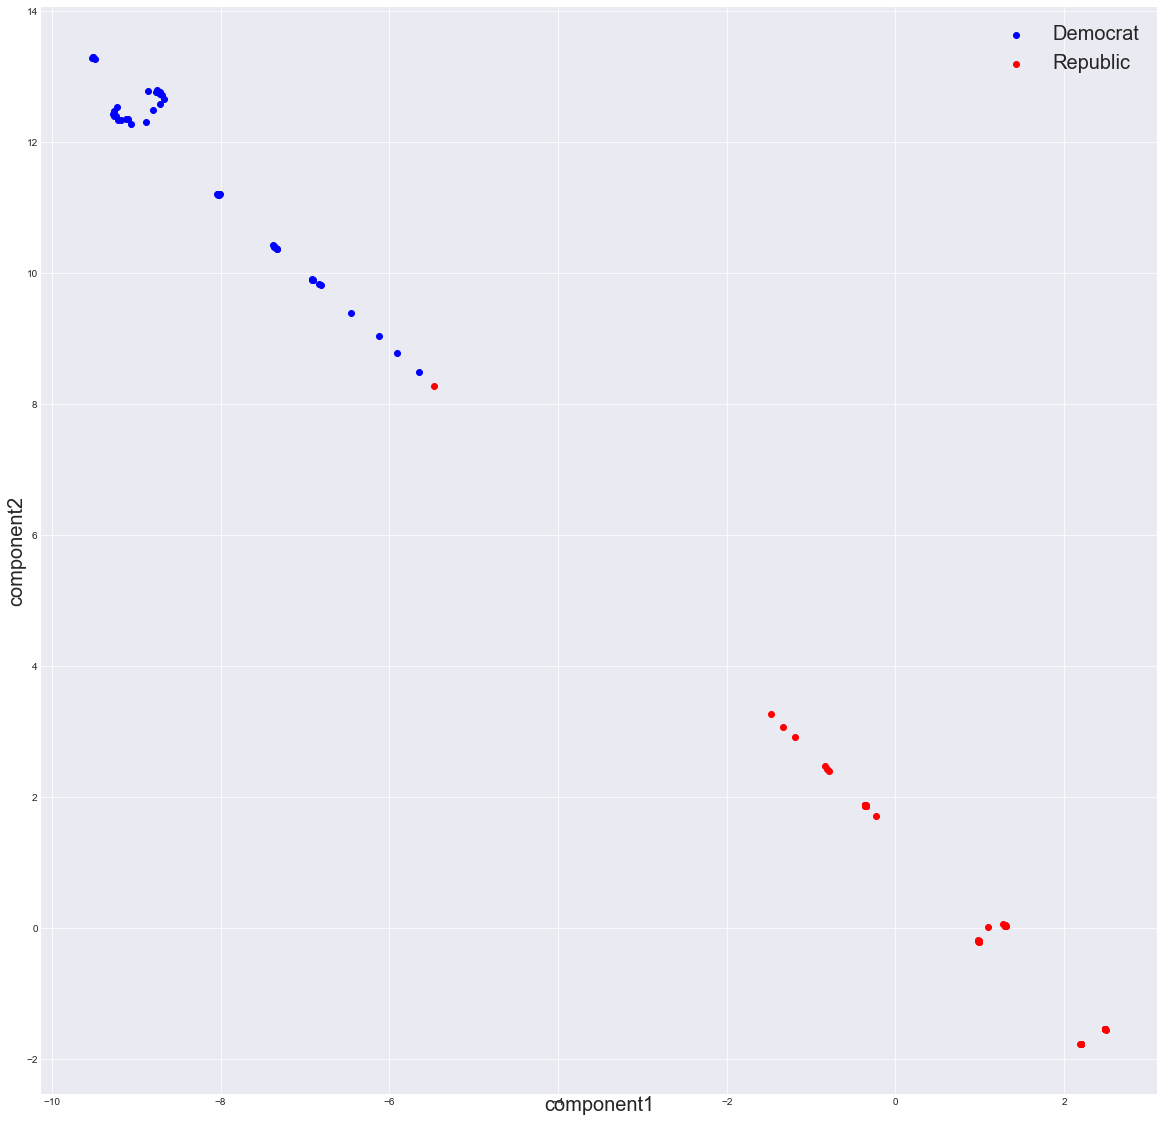

In [76]:
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams['axes.titlesize'] = 14
colors = ['blue' if x == 0 else 'red' for x in data.get_node_classes()]
labels = ['Democrat' if x == 0 else 'Republican' for x in data.get_node_classes()]
fig, ax = plt.subplots()
label_dict = {0: 'Democrat', 1: 'Republic'}
color_dict = {0: 'blue', 1: 'red'}
xs = set(x for x in data.get_node_classes())
classes = np.array(data.get_node_classes())
for x in xs:
    ids = np.array(range(len(classes)))[classes == x]
    ax.scatter(x=transformed_vecs[ids,0], y=transformed_vecs[ids, 1], label=label_dict[x], c=color_dict[x])

#ax.set_title('$\mathbb{R}^2$ Projection of Senate Dataset')

font_dict = fontdict={'fontsize': 20,
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}

ax.set_xlabel('component1', fontdict=font_dict)
ax.set_ylabel('component2', fontdict=font_dict)
ax.legend(prop={'size': font_dict['fontsize']})
ax.grid(True)
fig.savefig('SenateProjection.png')

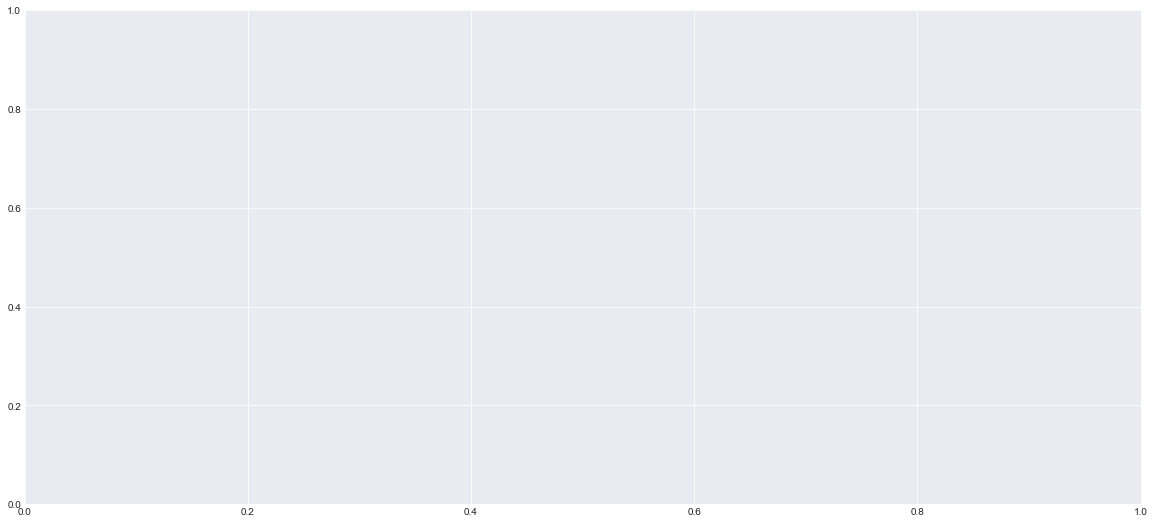

In [38]:
arr = plt.subplot(211)

In [39]:
arr

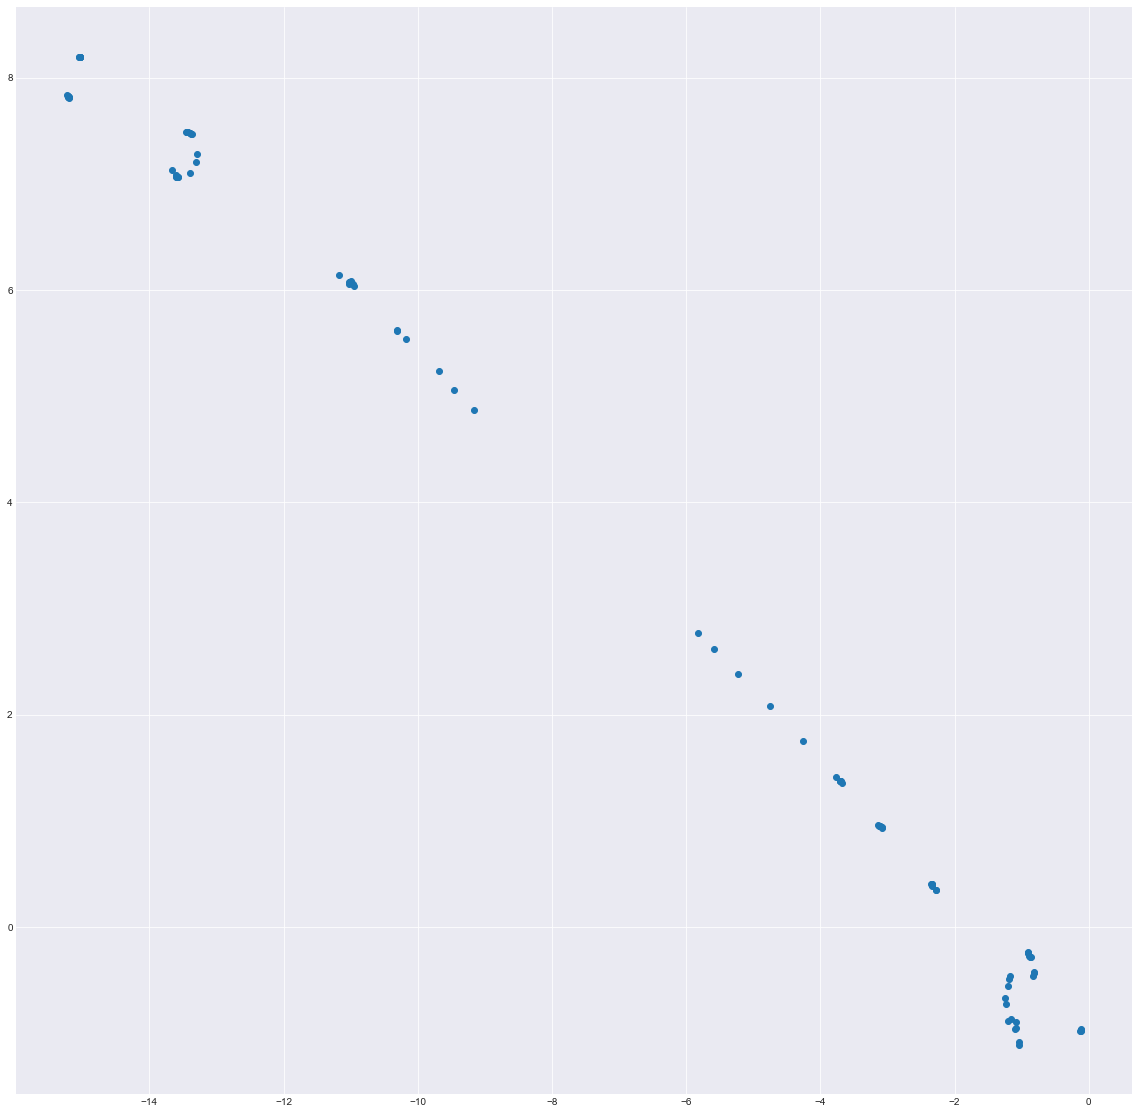

In [40]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1])

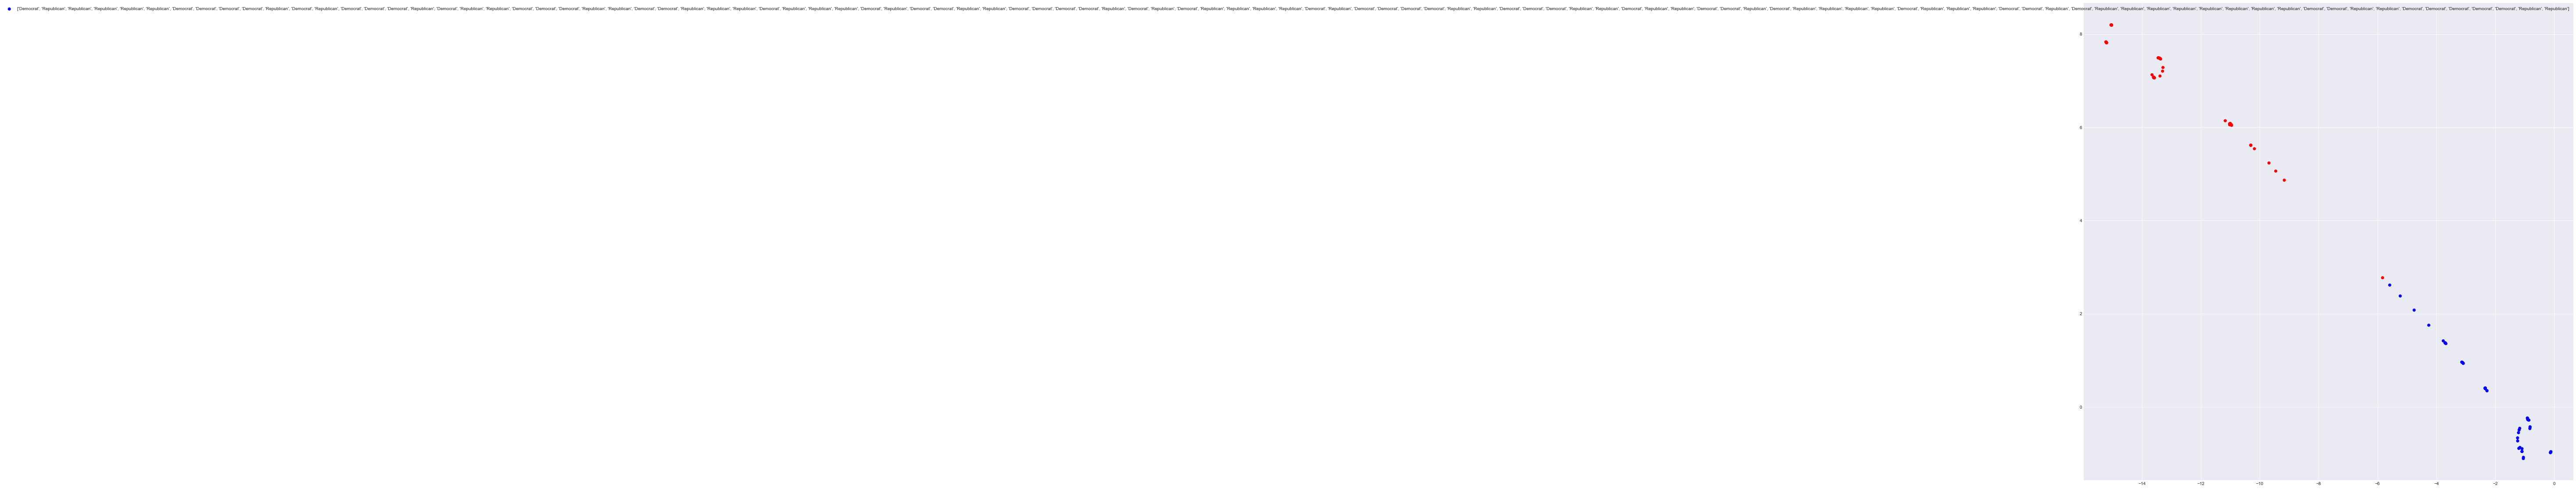

In [41]:
fig, ax = plt.subplots()
ax.scatter(transformed_vecs[:,0], transformed_vecs[:,1], c=colors, label=labels)
ax.legend()
ax.grid(True)
plt.show()

In [42]:
import matplotlib.lines as lines

In [43]:
blue_lines = lines.Line2D([],[], color='blue', label='Democrat', marker='.')
red_lines = lines.Line2D([],[], color='red', label='Republican', marker='.')

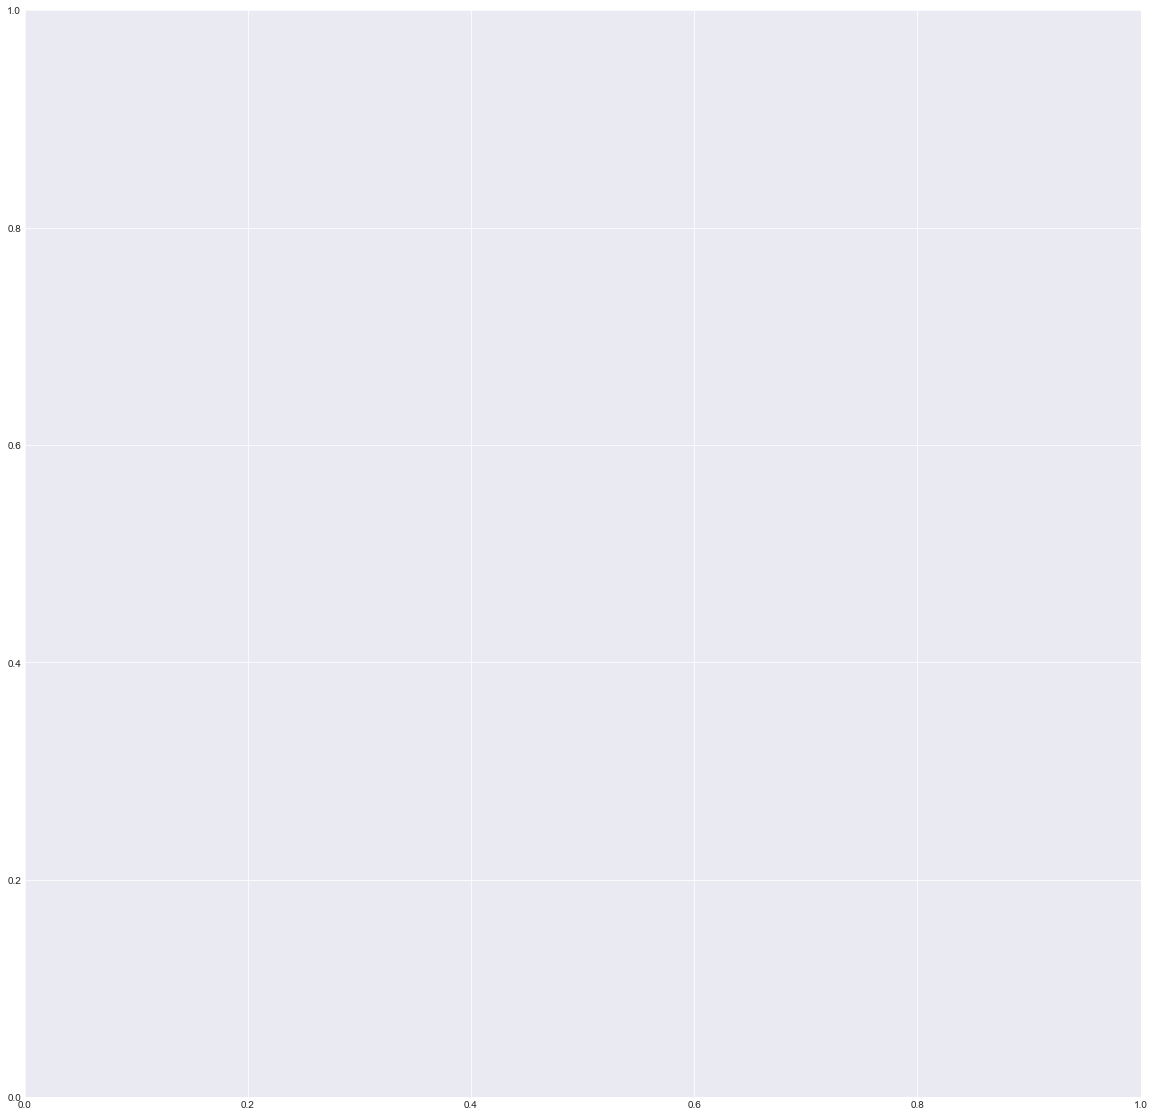

In [44]:
plt.legend([blue_lines, red_lines])

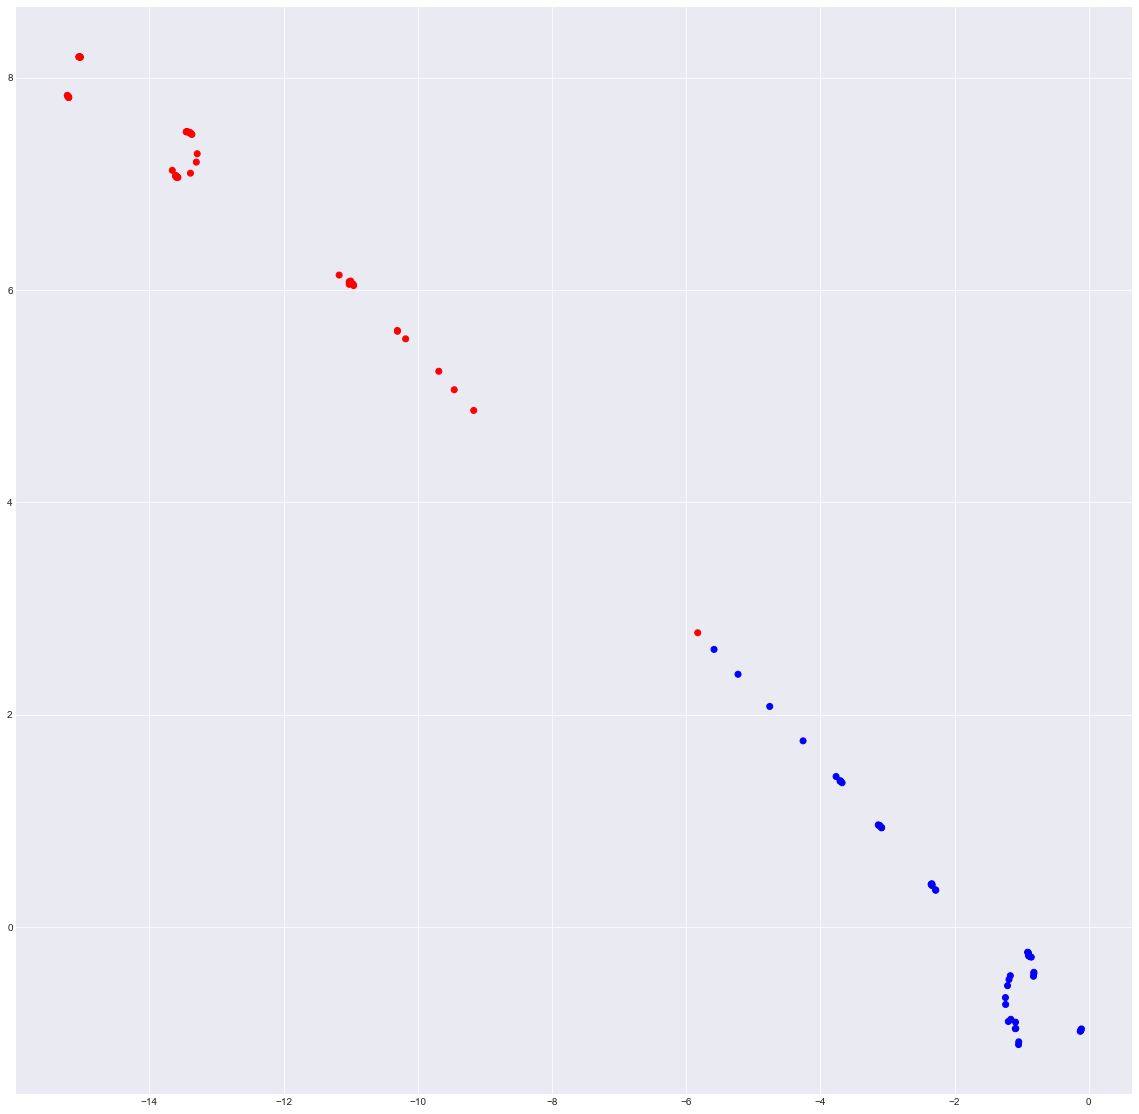

In [45]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1], c=colors)

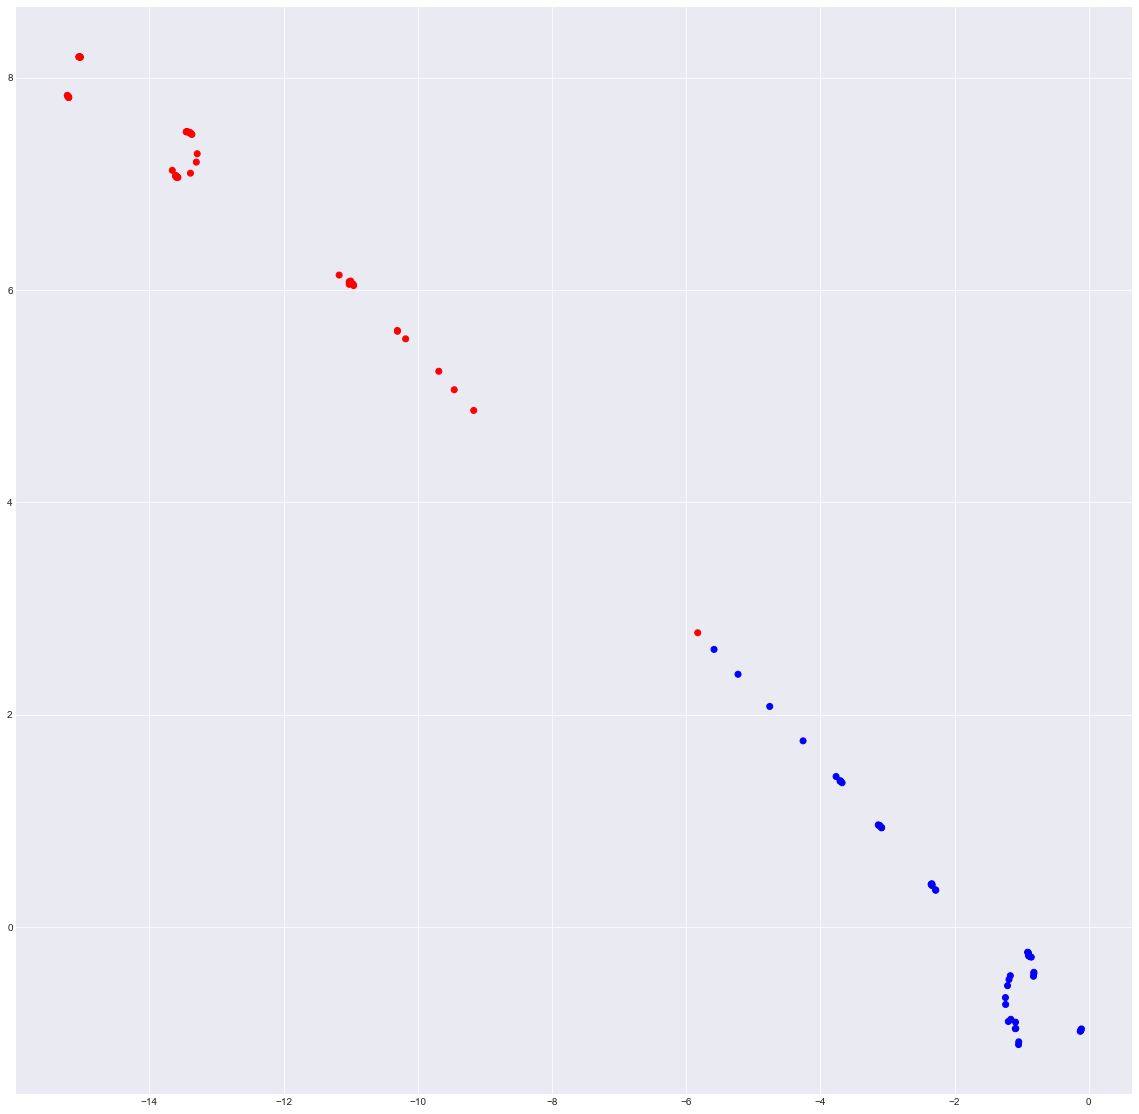

In [46]:
plt.scatter(transformed_vecs[:,0], transformed_vecs[:,1], c=colors)

In [47]:
not_noise = np.array(range(len(cluster_labels)))[cluster_labels != -1]

In [48]:
not_noise_vecs = transformed_vecs[not_noise, :]

In [49]:
not_noise_labels = cluster_labels[not_noise]

In [50]:
len(not_noise_vecs)

88

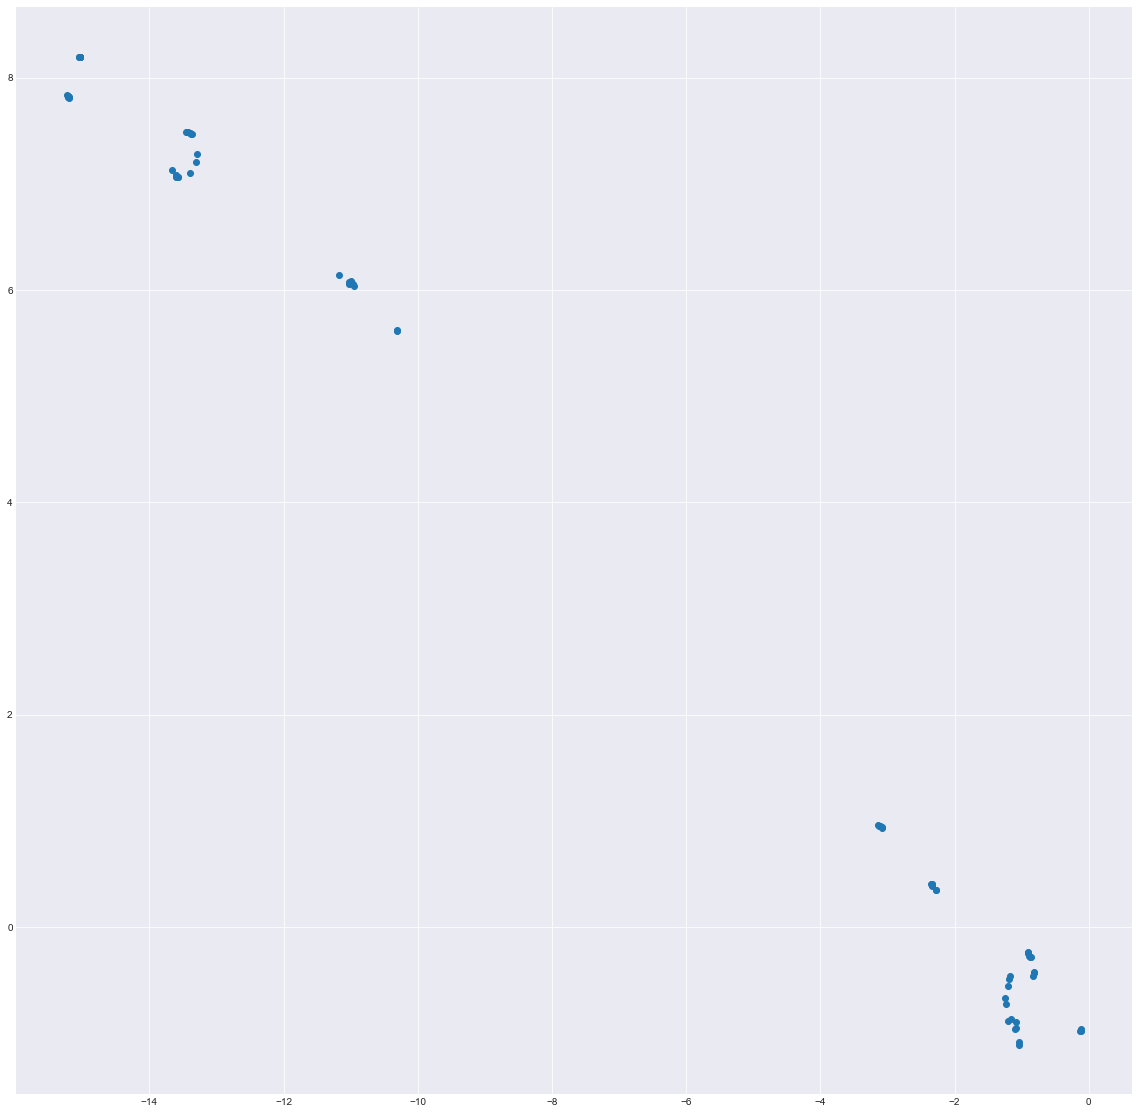

In [51]:
plt.scatter(not_noise_vecs[:,0], not_noise_vecs[:,1])

In [52]:
zero_cluster = np.array(range(len(cluster_labels)))[cluster_labels == 0]

In [53]:
zero_cluster

array([  3,  16,  28,  32,  33,  48,  51,  63,  70,  75,  79,  85,  89,
        94, 101])

In [54]:
for x in zero_cluster:
    for y in zero_cluster:
        if x != y:
            inpt_x = Variable(torch.LongTensor([int(x) + 1]))
            inpt_y = Variable(torch.LongTensor([int(y) + 1]))
            #print(inpt_x)
            print(kernel_model(inpt_x, inpt_y))

Variable containing:
 1.0000e+00  7.1570e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.8039e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  6.9767e-19
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.9896e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  8.5784e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.9305e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.9672e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.7752e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  8.5620e-16
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  3.9272e-18
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.1335e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.7208e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.9734e-17
[torch.FloatTensor 


Variable containing:
 1.0000e+00  3.8191e-18
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  4.1567e-18
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  4.3055e-18
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  4.2004e-18
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.1063e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  6.8801e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.5026e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  6.6765e-19
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.6814e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  8.2480e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.6245e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.6599e-17
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  7.4751e-17
[torch.FloatTensor

In [55]:
one_cluster = np.array(range(len(cluster_labels)))[cluster_labels == 1]

In [56]:
for x in one_cluster[:3]:
    for y in zero_cluster:
        if x != y:
            inpt_x = Variable(torch.LongTensor([int(x) + 1]))
            inpt_y = Variable(torch.LongTensor([int(y) + 1]))
            #print(inpt_x)
            print(kernel_model(inpt_x, inpt_y))

Variable containing:
 1.0000e+00  1.1628e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.1374e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2066e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  2.4508e-12
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2273e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2872e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2197e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2252e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.2050e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  6.4842e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  8.7238e-12
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.1338e-11
[torch.FloatTensor of size 1x2]

Variable containing:
 1.0000e+00  1.1981e-11
[torch.FloatTensor 

In [57]:
clf = linear_model.LogisticRegression()
reports = classifiers.train_and_evaluate_classifier(clf, kernel_model, X_train, y_train, X_test, y_test,
                                                    operation='average', undersample=True, ratio=2)

Assembling training set features....
Fitting classifier model
Assembling testing set features


In [58]:
reports

{'auc': 0.59235870483067876,
 'average_percision_score': 0.48321808021572948,
 'classification_report': '             precision    recall  f1-score   support\n\n          0       0.59      0.72      0.65      1126\n          1       0.56      0.41      0.48       976\n\navg / total       0.58      0.58      0.57      2102\n',
 'confusion_matrix': array([[813, 313],
        [573, 403]]),
 'kappa': 0.1373722065150127,
 'macro_f1': 0.56182616584601952,
 'mathew': 0.14199715228080489,
 'micro_f1': 0.57849666983824932}

In [59]:
mds = MDS(n_components=2, max_iter=100, n_init=1)
mds_transformed_vecs = mds.fit_transform(vecs)

ValueError: Array must be symmetric

In [92]:
mds_transformed_vecs

array([[ -7.60696952e+00,   2.04837034e+00],
       [  7.29039426e+00,   2.18655412e+00],
       [ -1.73645750e+00,   7.72647508e-01],
       ..., 
       [  1.80892698e-01,   1.70493662e-01],
       [ -1.34571525e-01,  -2.98967273e-02],
       [ -9.84608925e-02,   1.92789839e-03]])

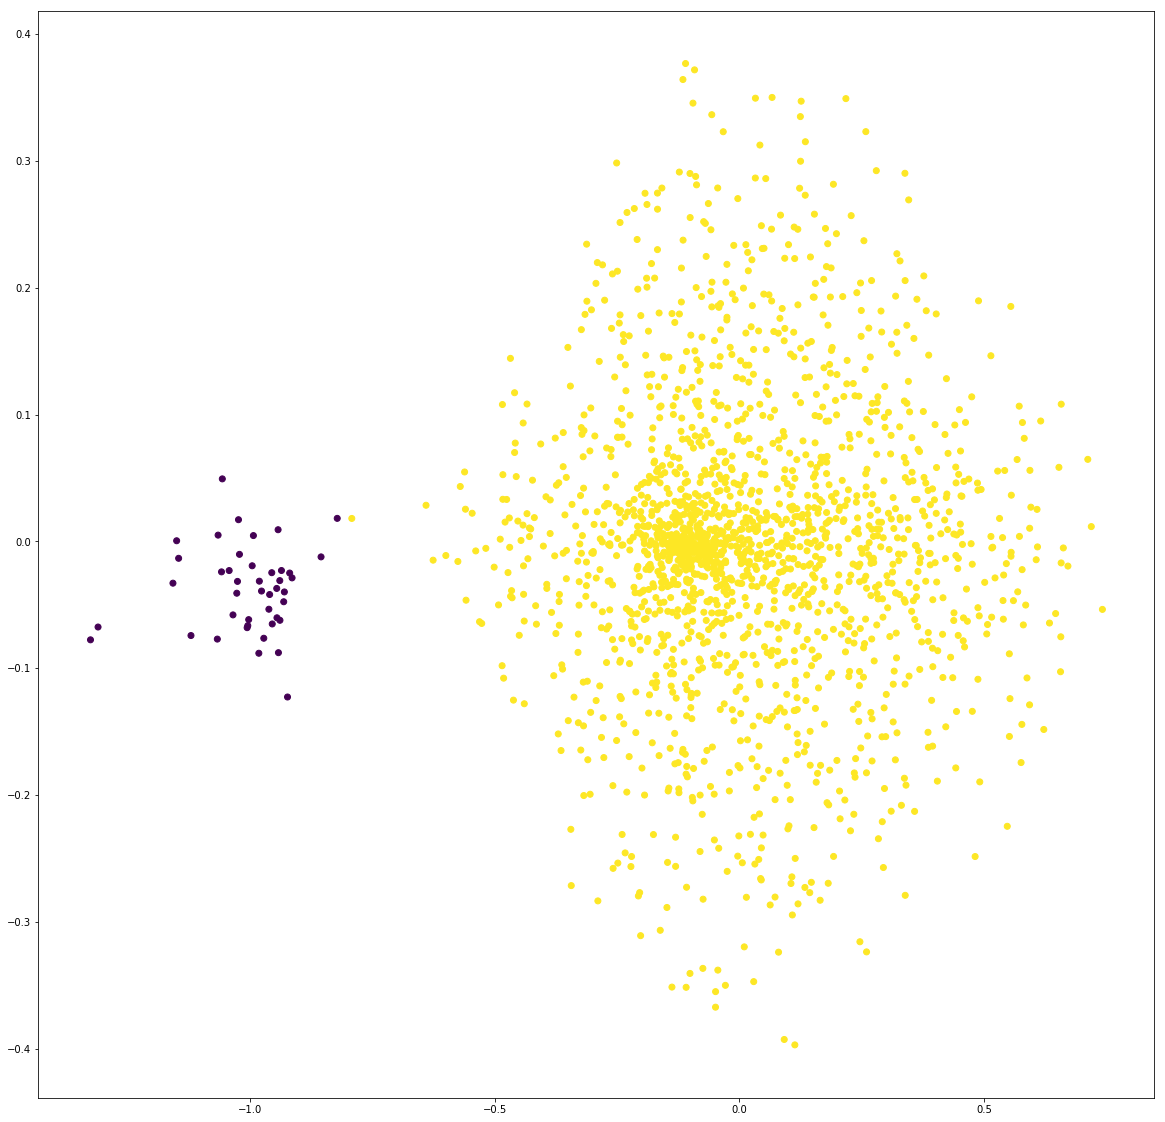

In [93]:
plt.scatter(mds_transformed_vecs[not_noise,0], mds_transformed_vecs[not_noise,1], c=not_noise_labels)